In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import collections

warnings.filterwarnings(action='once')

In [20]:
df = pd.read_csv("exoplanet_data.csv")
del df['rowid']
df.dropna(axis=1, how="any", inplace=True)
df = df.select_dtypes(['number'])
df_d

,pl_pnum,pl_ttvflag,pl_kepflag,pl_k2flag,pl_nnotes,ra,dec,pl_tranflag,pl_rvflag,pl_imgflag,...,st_elat,st_nts,st_nplc,st_nglc,st_nrvc,st_naxa,st_nimg,st_nspec,st_photn,st_colorn
0,1,0,0,0,0,185.179276,17.792868,0,1,0,...,18.333765,3,0,1,2,0,3,0,20,7
1,1,0,0,0,0,229.274536,71.823898,0,1,0,...,74.958184,2,0,1,1,0,3,0,17,5
2,1,0,0,0,0,352.822571,39.236198,0,1,0,...,38.229937,2,0,1,1,0,3,0,21,7
3,1,0,0,0,0,242.601303,43.817646,0,1,0,...,62.879798,5,0,1,4,0,4,1,25,9
4,1,0,0,0,0,295.466553,50.517525,0,1,0,...,69.468372,5,0,1,4,0,4,3,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,1,0,0,0,0,107.784882,30.245163,0,1,0,...,7.754448,1,0,1,0,0,3,0,20,7
3834,3,0,0,0,0,24.199345,41.405460,0,1,0,...,28.980317,11,0,1,10,0,4,1,24,8
3835,3,0,0,0,0,24.199345,41.405460,0,1,0,...,28.980317,11,0,1,10,0,4,1,24,8
3836,3,0,0,0,0,24.199345,41.405460,0,1,0,...,28.980317,11,0,1,10,0,4,1,24,8


In [21]:
corrP_d = df.corr(method="pearson", min_periods=3500)
corrP_d.style.background_gradient(cmap='coolwarm')

/Users/adityamittal/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/adityamittal/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin


,pl_pnum,pl_ttvflag,pl_kepflag,pl_k2flag,pl_nnotes,ra,dec,pl_tranflag,pl_rvflag,pl_imgflag,pl_omflag,pl_cbflag,pl_disc,pl_status,pl_mnum,pl_st_npar,pl_st_nref,st_rah,st_glon,st_glat,st_elon,st_elat,st_nts,st_nplc,st_nglc,st_nrvc,st_naxa,st_nimg,st_nspec,st_photn,st_colorn
pl_pnum,1.000000,0.310500,0.137285,0.014602,0.120640,0.090751,0.094374,0.040779,-0.048999,-0.040651,-0.029301,-0.038258,-0.069380,nan,nan,0.280871,0.222702,0.090751,-0.081114,-0.030150,0.090623,0.098760,-0.045817,-0.062806,0.001058,0.024747,-0.047900,0.136538,0.151188,0.127879,0.109204
pl_ttvflag,0.310500,1.000000,0.167073,-0.033752,0.172173,0.121183,0.123310,0.133413,-0.065229,-0.027308,0.015115,0.044795,-0.070895,nan,nan,0.244062,0.062721,0.121183,-0.110646,0.030859,0.127628,0.137668,-0.056728,-0.030275,-0.117125,-0.066289,-0.018764,-0.018776,-0.046706,-0.020695,-0.045013
pl_kepflag,0.137285,0.167073,1.000000,-0.413403,0.831231,0.631445,0.756696,0.620056,-0.662169,-0.133331,0.026465,-0.031785,0.340370,nan,nan,0.042093,-0.235223,0.631445,-0.617482,0.247708,0.679782,0.853410,-0.267070,-0.135805,-0.560548,-0.339265,-0.076670,-0.040823,-0.255943,-0.087186,-0.169950
pl_k2flag,0.014602,-0.033752,-0.413403,1.000000,-0.340475,-0.273057,-0.269077,0.165219,-0.082353,-0.035132,-0.028798,-0.027257,0.272949,nan,nan,-0.093654,-0.212065,-0.273057,0.290125,-0.009153,-0.298268,-0.340422,-0.071386,-0.038948,-0.108971,-0.094916,-0.024140,-0.103414,-0.065695,0.031404,-0.131018
pl_nnotes,0.120640,0.172173,0.831231,-0.340475,1.000000,0.552703,0.630479,0.556372,-0.565833,-0.004183,0.024408,-0.066583,0.252284,nan,nan,0.182915,-0.138736,0.552703,-0.532909,0.208737,0.587528,0.717006,-0.152596,-0.061716,-0.471656,-0.261589,0.011114,-0.014172,-0.209191,-0.056023,-0.132144
ra,0.090751,0.121183,0.631445,-0.273057,0.552703,1.000000,0.443592,0.386761,-0.448733,-0.062031,0.009108,-0.008837,0.202404,nan,nan,0.031244,-0.172888,1.000000,-0.556658,0.230171,0.857000,0.658543,-0.126236,-0.013293,-0.378346,-0.228668,-0.015069,-0.030352,-0.167294,-0.099594,-0.131581
dec,0.094374,0.123310,0.756696,-0.269077,0.630479,0.443592,1.000000,0.501683,-0.476659,-0.129380,0.030682,-0.038640,0.274168,nan,nan,0.080441,-0.178640,0.443592,-0.677511,0.407950,0.361745,0.944409,-0.130444,-0.097868,-0.412184,-0.178644,0.020754,0.017372,-0.110322,-0.046220,-0.182356
pl_tranflag,0.040779,0.133413,0.620056,0.165219,0.556372,0.386761,0.501683,1.000000,-0.582842,-0.204688,-0.006077,-0.081210,0.530760,nan,nan,0.113214,-0.484967,0.386761,-0.388138,0.185869,0.421248,0.539007,-0.214324,-0.071723,-0.800415,-0.377947,0.037048,-0.174443,-0.364093,-0.226095,-0.421320
pl_rvflag,-0.048999,-0.065229,-0.662169,-0.082353,-0.565833,-0.448733,-0.476659,-0.582842,1.000000,-0.066319,0.090639,0.006110,-0.509368,nan,nan,0.281408,0.460408,-0.448733,0.387487,-0.200142,-0.475186,-0.555172,0.292579,0.072245,0.624557,0.428762,0.108643,0.159348,0.305032,0.213803,0.307977
pl_imgflag,-0.040651,-0.027308,-0.133331,-0.035132,-0.004183,-0.062031,-0.129380,-0.204688,-0.066319,1.000000,-0.009288,0.081745,-0.107927,nan,nan,-0.128867,0.008858,-0.062031,0.133644,-0.051240,-0.078259,-0.130246,-0.010217,-0.012562,0.069344,-0.026230,-0.007786,0.026304,-0.014748,0.058357,0.084237


RA and st_elon are highly correlated
st_glon and st_elat are highly correlated
st_elat and dec are highly correlated
st_rah and st_elon are highly correlated
st_colorn and st_rah

In [37]:
scat_df = pd.read_csv("exoplanet_data.csv")
scat_df.drop([3585], inplace=True) #found from scat_df['pl_orbper'].idxmax() to be an outlier

/Users/adityamittal/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


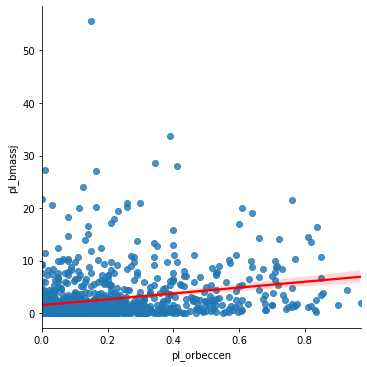

In [38]:
sns.lmplot(x='pl_orbeccen',y='pl_bmassj',data=scat_df,
            fit_reg=True, line_kws={'color': 'red'}) 

/Users/adityamittal/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


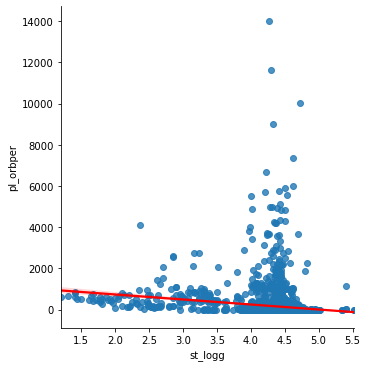

In [39]:
sns.lmplot(x='st_logg',y='pl_orbper',data=scat_df,
            fit_reg=True, line_kws={'color': 'red'}) 

/Users/adityamittal/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/adityamittal/opt/anaconda3/lib/python3.8/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping


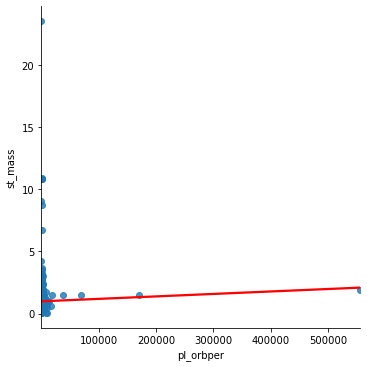

In [42]:
sns.lmplot(x='pl_orbper',y='st_mass',data=scat_df,
            fit_reg=True, line_kws={'color': 'red'}, ci=None,
          robust=True) 

In [54]:
kmeans_df = pd.read_csv("exoplanet_data.csv")
kmeans_df = kmeans_df.select_dtypes(['number'])
del kmeans_df['rowid']
kmeans_df = kmeans_df.fillna(kmeans_df.mean())
kmeans_df.dropna(axis=1, inplace=True)
kmeans_np = kmeans_df.to_numpy()

/Users/adityamittal/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1.00000000e+00, 3.26030000e+02, 3.20000000e-01, ...,
        5.38244514e-03, 0.00000000e+00, 7.00000000e+00],
       [1.00000000e+00, 5.16219970e+02, 3.20000000e+00, ...,
        5.38244514e-03, 0.00000000e+00, 5.00000000e+00],
       [1.00000000e+00, 1.85840000e+02, 2.30000000e-01, ...,
        5.38244514e-03, 0.00000000e+00, 7.00000000e+00],
       ...,
       [3.00000000e+00, 2.41258000e+02, 6.40000000e-02, ...,
        5.38244514e-03, 0.00000000e+00, 8.00000000e+00],
       [3.00000000e+00, 1.27646000e+03, 5.70000000e-01, ...,
        5.38244514e-03, 0.00000000e+00, 8.00000000e+00],
       [1.00000000e+00, 1.36750000e+02, 2.50000000e-01, ...,
        5.38244514e-03, 0.00000000e+00, 9.00000000e+00]])

/Users/adityamittal/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Elbow curve')

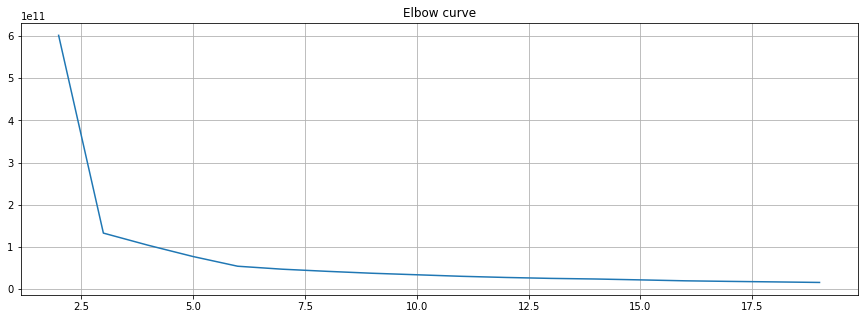

In [55]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = kmeans_np
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

/Users/adityamittal/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

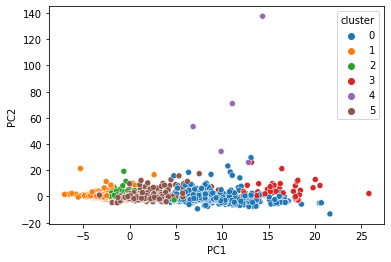

In [62]:
Sc = StandardScaler()
X = Sc.fit_transform(kmeans_df)
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2']) 
kmeans = KMeans(n_clusters=6).fit(X)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

In [73]:
print(list(kmeans.labels_)[498])
print(list(kmeans.labels_)[579])
print(list(kmeans.labels_)[793])
print(list(kmeans.labels_)[327])
print(list(kmeans.labels_)[425])

2
2
2
2
2


In [85]:
counter = collections.Counter(list(kmeans.labels_))
cd = dict(counter)
D = collections.OrderedDict(sorted(cd.items()))

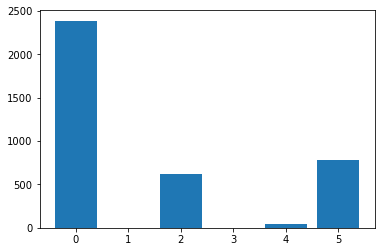

In [86]:
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()